# Q3:


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## part one:

In [77]:
drug_file_path = "drug_safety.csv"
drug_df = pd.read_csv(drug_file_path)

drug_df.head()


,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [78]:
drug_df.tail()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0
16102,78,male,Placebo,8,7.8,4.8,No,0


## part two:

In [79]:
drug_df.isna().sum()

age                   0
sex                   0
trx                   0
week                  0
wbc                6975
rbc                6976
adverse_effects       0
num_effects           0
dtype: int64

In [80]:
missing_percentage = (drug_df.isna().sum() / len(drug_df)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
age                 0.00000
sex                 0.00000
trx                 0.00000
week                0.00000
wbc                43.31491
rbc                43.32112
adverse_effects     0.00000
num_effects         0.00000
dtype: float64


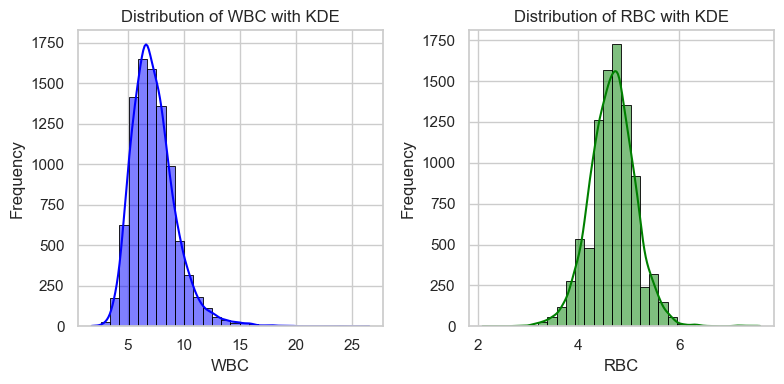

In [81]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(drug_df['wbc'].dropna(), kde=True, color='blue', bins=30, edgecolor='black')
plt.title('Distribution of WBC with KDE')
plt.xlabel('WBC')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(drug_df['rbc'].dropna(), kde=True, color='green', bins=30, edgecolor='black')
plt.title('Distribution of RBC with KDE')
plt.xlabel('RBC')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [82]:
wbc_skewness = drug_df['wbc'].skew()
rbc_skewness = drug_df['rbc'].skew()
print(f"Skewness of WBC: {wbc_skewness}")
print(f"Skewness of RBC: {rbc_skewness}")

Skewness of WBC: 1.2609293914144093
Skewness of RBC: 0.14679504482474087


from the result above we can understand that the rbc is more likely like a normal distribution but wbc is a right-skewed distribution but because we have medical dataset it is not a good idea to fill the Null values with mean and median so we drop the rows that have a NaN value.

In [83]:
drug_df = drug_df.dropna()
drug_df.isna().sum()

age                0
sex                0
trx                0
week               0
wbc                0
rbc                0
adverse_effects    0
num_effects        0
dtype: int64

In [84]:
len(drug_df)

9127

we still have 9,127 rows of data after dropping missing values, so definitely we have enough data for the Central Limit Theorem (CLT) to apply.

still we have enough data to have the CLT 

## part three:

In [85]:
drug_df.describe()

,age,week,wbc,rbc,num_effects
count,9127.000000,9127.000000,9127.000000,9127.000000,9127.000000
mean,64.007670,4.985428,7.340331,4.672784,0.100800
std,8.847711,4.375397,1.996645,0.458520,0.322178
min,39.000000,0.000000,1.800000,2.100000,0.000000
25%,58.000000,2.000000,6.000000,4.400000,0.000000
50%,65.000000,4.000000,7.100000,4.700000,0.000000
75%,71.000000,8.000000,8.400000,5.000000,0.000000
max,84.000000,20.000000,26.500000,7.600000,3.000000


## part four:

In [86]:
grouped_features = ['wbc', 'rbc', 'num_effects']
statistic_funcs = ['mean', 'std', 'count','min', 'max']
df_grouped = drug_df.groupby('trx')[grouped_features].agg(statistic_funcs)
df_grouped

wbc                                       rbc                  \
             mean       std count  min        max      mean       std count   
trx                                                                           
Drug     7.330461  2.008941  6011  1.8  26.500000  4.679130  0.454990  6011   
Placebo  7.359371  1.972890  3116  3.0  23.799999  4.660542  0.465083  3116   

                  num_effects                          
         min  max        mean       std count min max  
trx                                                    
Drug     2.7  7.5    0.102479  0.325529  6011   0   3  
Placebo  2.1  7.6    0.097561  0.315639  3116   0   3

## part five:

In [87]:
drug_df['adverse_effects'].value_counts()

adverse_effects
No     8263
Yes     864
Name: count, dtype: int64

In [88]:
drug_df['adverse_effects'] = drug_df['adverse_effects'].map({'Yes':1, 'No':0})
drug_df['adverse_effects'].value_counts()

adverse_effects
0    8263
1     864
Name: count, dtype: int64

In [89]:
drug_df['adverse_effects'].mean()

0.09466418319272488

## part six:

### **How Hypothesis Testing Works**

In hypothesis testing, we compare two groups (e.g., Drug vs. Placebo) to determine if there is a statistically significant difference between them. The process involves:

1. **Null Hypothesis (\(H_0\))**:
   - Assumes **no significant difference** between the groups.
   - Mathematically:
     $$
     H_0: \mu_{\text{Drug}} - \mu_{\text{Placebo}} = 0
     $$

2. **Alternative Hypothesis (\(H_1\))**:
   - Assumes **there is a significant difference** between the groups.
   - Mathematically:
     $$
     H_1: \mu_{\text{Drug}} - \mu_{\text{Placebo}} \neq 0
     $$

3. **Test Statistic**:
   - Measures the difference between group means relative to variability.

4. **p-value**:
   - Probability of observing the test statistic (or more extreme) if $(H_0)$ is true.
   - If $(p < 0.alpha)$, reject $(H_0)$; otherwise, fail to reject $(H_0)$.

---

### a. mean white blood cell count

In [90]:
from scipy.stats import ttest_ind

wbc_drug = drug_df[drug_df['trx'] == 'Drug']['wbc']
wbc_placebo = drug_df[drug_df['trx'] == 'Placebo']['wbc']

t_stat, p_value = ttest_ind(wbc_drug, wbc_placebo, equal_var=False, alternative='two-sided')

alpha_1 = 0.05
alpha_2 = 0.1

print("WBC results:")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < alpha_1:
    print(f"Reject the null hypothesis(alpha = {alpha_1}): There is a significant difference in mean WBC between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_1}): No significant difference in mean WBC between Drug and Placebo groups.")


if p_value < alpha_2:
    print(f"Reject the null hypothesis(alpha = {alpha_2}): There is a significant difference in mean WBC between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_2}): No significant difference in mean WBC between Drug and Placebo groups.")

WBC results:
t-statistic:  -0.6596884009910975
p-value:  0.5094775322580585
Fail to reject the null hypothesis(alpha = 0.05): No significant difference in mean WBC between Drug and Placebo groups.
Fail to reject the null hypothesis(alpha = 0.1): No significant difference in mean WBC between Drug and Placebo groups.


### b.mean red blood cell count

In [91]:
rbc_drug = drug_df[drug_df['trx'] == 'Drug']['rbc']
rbc_placebo = drug_df[drug_df['trx'] == 'Placebo']['rbc']

t_stat, p_value = ttest_ind(rbc_drug, rbc_placebo, equal_var=False, alternative='two-sided')

alpha_1 = 0.05
alpha_2 = 0.1

print("RBC results:")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < alpha_1:
    print(f"Reject the null hypothesis(alpha = {alpha_1}): There is a significant difference in mean RBC between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_1}): No significant difference in mean RBC between Drug and Placebo groups.")


if p_value < alpha_2:
    print(f"Reject the null hypothesis(alpha = {alpha_2}): There is a significant difference in mean RBC between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_2}): No significant difference in mean RBC between Drug and Placebo groups.")

RBC results:
t-statistic:  1.8239231444207347
p-value:  0.06821193346979416
Fail to reject the null hypothesis(alpha = 0.05): No significant difference in mean RBC between Drug and Placebo groups.
Reject the null hypothesis(alpha = 0.1): There is a significant difference in mean RBC between Drug and Placebo groups.


### c. mean num effects

In [92]:
num_effects_drug = drug_df[drug_df['trx'] == 'Drug']['num_effects']
num_effects_placebo = drug_df[drug_df['trx'] == 'Placebo']['num_effects']

t_stat, p_value = ttest_ind(num_effects_drug, num_effects_placebo, equal_var=False, alternative='two-sided')

alpha_1 = 0.05
alpha_2 = 0.1

print("Num Effects results:")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < alpha_1:
    print(f"Reject the null hypothesis(alpha = {alpha_1}): There is a significant difference in mean Num Effects between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_1}): No significant difference in mean Num Effects between Drug and Placebo groups.")


if p_value < alpha_2:
    print(f"Reject the null hypothesis(alpha = {alpha_2}): There is a significant difference in mean Num Effects between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_2}): No significant difference in mean Num Effects between Drug and Placebo groups.")

Num Effects results:
t-statistic:  0.6982668655753146
p-value:  0.48503538645811195
Fail to reject the null hypothesis(alpha = 0.05): No significant difference in mean Num Effects between Drug and Placebo groups.
Fail to reject the null hypothesis(alpha = 0.1): No significant difference in mean Num Effects between Drug and Placebo groups.


### d. mean adverse effect

In [93]:
adverse_effects_drug = drug_df[drug_df['trx'] == 'Drug']['adverse_effects']
adverse_effects_placebo = drug_df[drug_df['trx'] == 'Placebo']['adverse_effects']

t_stat, p_value = ttest_ind(adverse_effects_drug, adverse_effects_placebo, equal_var=False, alternative='two-sided')

alpha_1 = 0.05
alpha_2 = 0.1

print("Adverse Effects results:")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < alpha_1:
    print(f"Reject the null hypothesis(alpha = {alpha_1}): There is a significant difference in mean Adverse Effects between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_1}): No significant difference in mean Adverse Effects between Drug and Placebo groups.")


if p_value < alpha_2:
    print(f"Reject the null hypothesis(alpha = {alpha_2}): There is a significant difference in mean Adverse Effects between Drug and Placebo groups.")
else:
    print(f"Fail to reject the null hypothesis(alpha = {alpha_2}): No significant difference in mean Adverse Effects between Drug and Placebo groups.")

Adverse Effects results:
t-statistic:  0.6047130244978415
p-value:  0.54539110892564
Fail to reject the null hypothesis(alpha = 0.05): No significant difference in mean Adverse Effects between Drug and Placebo groups.
Fail to reject the null hypothesis(alpha = 0.1): No significant difference in mean Adverse Effects between Drug and Placebo groups.


### significant level(alpha):
The significance level represents the probability of making a Type I error (incorrectly rejecting the null hypothesis when it is true).

A lower significance level (e.g., 0.05) is more stringent and reduces the chance of false positives but increases the chance of false negatives.

A higher significance level (e.g., 0.1) is less stringent and increases the chance of detecting true effects but also increases the chance of false positives.

### alternative argument:
The alternative argument specifies the type of alternative hypothesis being tested. It can take one of three values:

- 'two-sided': Tests whether the means are not equal (default).

- 'greater': Tests whether the mean of the first group is greater than the mean of the second group.

- 'less': Tests whether the mean of the first group is less than the mean of the second group.

because we are talking about is there any difference (either higher or lower) between the Drug and Placebo groups we use 'two-sided'
because our $H_a$ shows the unequality between their means.

### equal argument:

The equal_var argument specifies whether to assume that the two groups have equal variances.

It can take two values:

True: Assumes equal variances (standard t-test).

False: Does not assume equal variances (Welch's t-test).

In this case we use the equal_var = False because we dont have an idea about their variances .This is especially important when the sample sizes or variances of the two groups are different.